<a href="https://colab.research.google.com/github/invoker-qqwrv/Beida_tensorflow/blob/main/5_10_write_a_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 用卷积网络训练cifar10数据集，
# 接下来搭建一个一层卷积，两层全连接的网络。
# 使用6个5*5的卷积核，2*2的最大池化。全0填充，池化步长为2.过128个神经元的全连接层，dense 128
# 因为输出是十个分类，所以最后过一个十个神经元的全连接层  dense 10
# softmax使得输出符合概率分布

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/5
1563/1563 [==============================] - 39s 24ms/step - loss: 1.6451 - sparse_categorical_accuracy: 0.4041 - val_loss: 1.3801 - val_sparse_categorical_accuracy: 0.4986
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4001 - sparse_categorical_accuracy: 0.4954 - val_loss: 1.3078 - val_sparse_categorical_accuracy: 0.5338
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3247 - sparse_categorical_accuracy: 0.5247 - val_loss: 1.3066 - val_sparse_categorical_accuracy: 0.5374
Epoch 4/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2788 - sparse_categorical_accuracy: 0.5399 - val_loss: 1.1807 - val_sparse_categorical_accuracy: 0.5817
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2402 - sparse_categorical_accuracy: 0.5570 - val_loss: 1.2076 - val_sparse_categorical_accuracy: 0.5693
Model: "baseline"


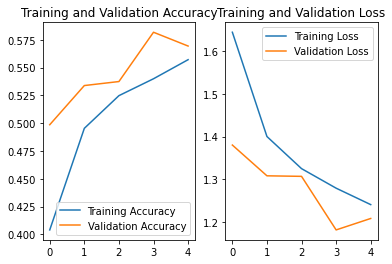

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)#当数组元素比较多的时候，如果输出该数组，那么会出现省略号。解决方法：在程序前写这段代码

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#因为网络相对复杂，所以用class搭建网络结构
# 下面用init函数准备出搭建神经网络要用到的每一层结构
#经典的神经网络只替换class这里的内容，其他不变
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # C卷积层
        self.b1 = BatchNormalization()                    #B BN层
        self.a1 = Activation('relu')                     #A 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  #P 池化层
        self.d1 = Dropout(0.2)                        #D dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')#送入128个神经元的全连接
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')#送入十个神经元的全连接。用softmax使得输出概率化
      
#调用init函数里面搭建好的每层网络结构。从输入到输出过一次前向传播。返回推理结果y
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                         save_weights_only=True,
                         save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')